In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [88]:
df = pd.read_csv ('./abalone.csv')
print (df.columns)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [98]:

DF=df.copy()

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(DF["Sex"])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#print(onehot_encoded)
print(DF.columns)

X_c=[i for i in DF.columns[1:]]
print(X_c)
DF=DF[X_c]
#print(onehot_encoded[:,0])
DF["M"]=onehot_encoded[:,0]
DF["I"]=onehot_encoded[:,1]
DF["F"]=onehot_encoded[:,2]

X=DF.copy()
y=X.pop('Rings')

cols_with_missing = [col for col in X.columns
                     if X[col].isnull().any()]
print(cols_with_missing)
X=X.drop(cols_with_missing, axis=1)
nan_value = float("NaN")
X.replace(0, nan_value, inplace=True)
X.replace("", nan_value, inplace=True)
X.dropna(how='all', axis=0, inplace=True)



print(X.columns)

missing_val_count_by_column = (X.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')
['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
[]
Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'M', 'I', 'F'],
      dtype='object')
Height       2
M         2870
I         2835
F         2649
dtype: int64


In [90]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    #print(mi_scores)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    #print(mi_scores)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
    #print(mi_scores)
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

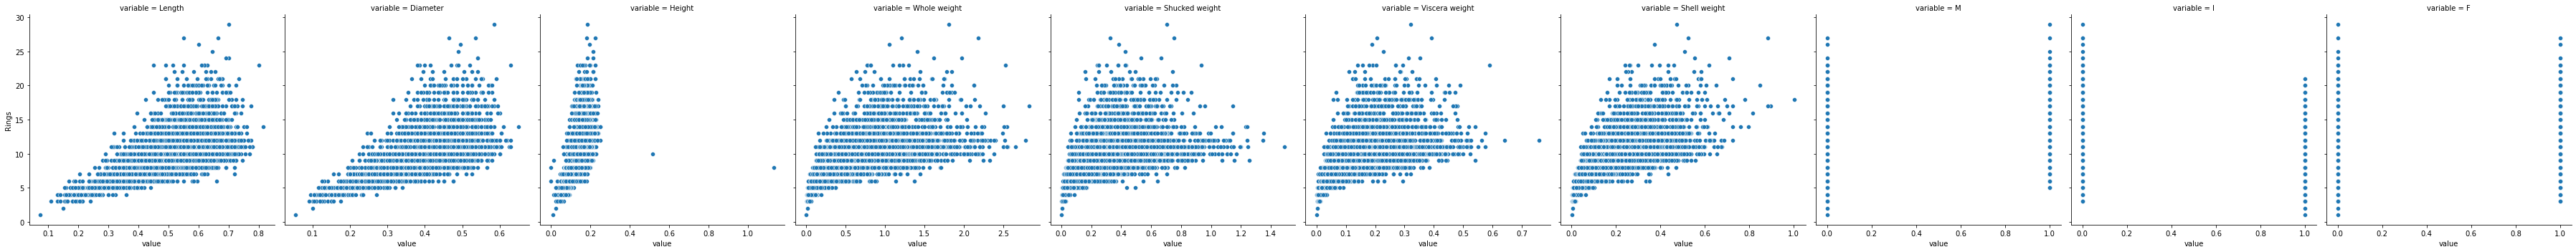

In [91]:
features = [i for i in X.columns]

sns.relplot(
    x="value", y="Rings", col="variable", data=DF.melt(id_vars="Rings", value_vars=features), facet_kws=dict(sharex=False),
);
#X=X.drop(columns=['Height','M','I','F'])
X=X.drop(columns=['Height'])

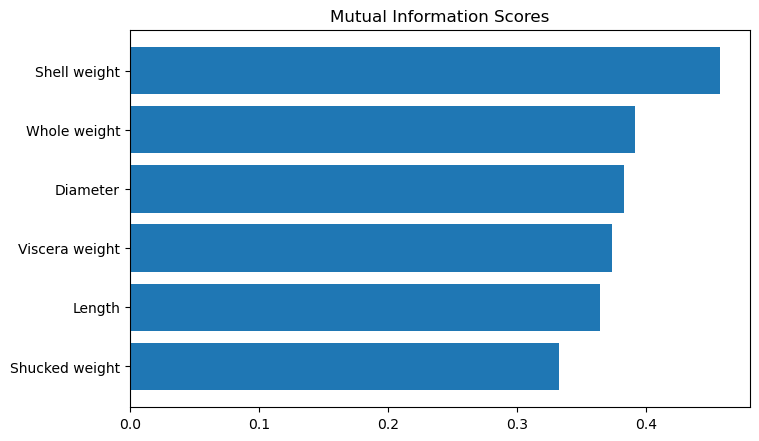

In [92]:
mi_scores = make_mi_scores(X, y)
#print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
train_X1, val_X1, train_y1, val_y1 = train_test_split(X, y, random_state = 0)

rf_model = RandomForestRegressor(random_state=1)

rf_model.fit(train_X1, train_y1)
ml=rf_model.predict(val_X1)

rf_val_mae = mean_squared_error(val_y1, ml)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 4.906807081339713


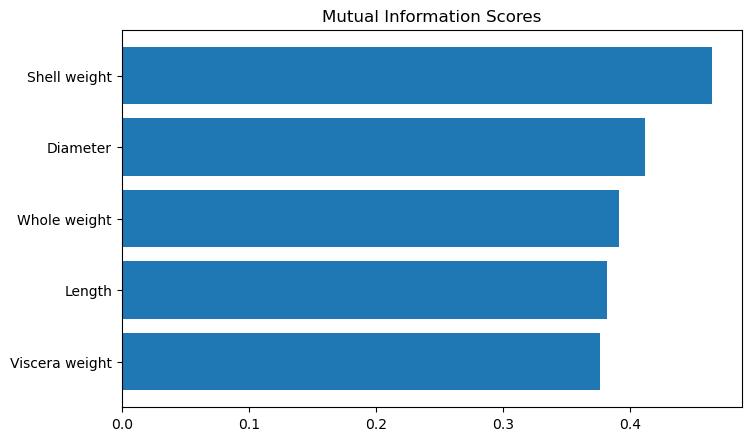

In [96]:

X=X.drop(columns=['Shucked weight','Viscera weight'])

mi_scores = make_mi_scores(X, y)
#print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))

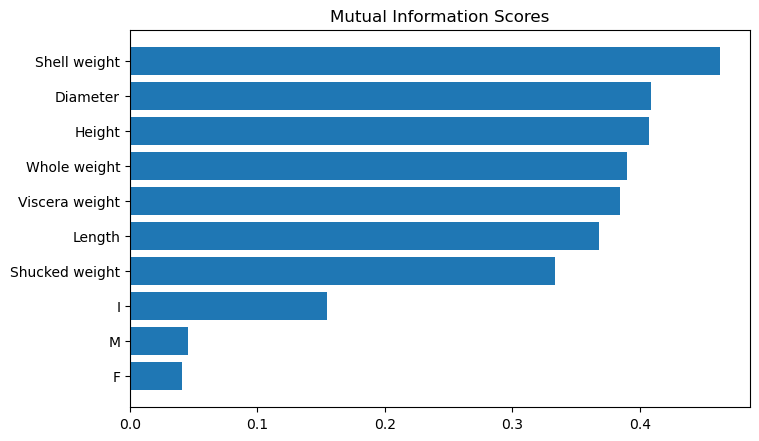

In [106]:
from sklearn.impute import SimpleImputer

Xr=DF.copy()
Xr.pop('Rings')

my_imputer = SimpleImputer()
X2 = pd.DataFrame(my_imputer.fit_transform(Xr))
X2.columns=Xr.columns

mi_scores = make_mi_scores(X2, y)
#print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))

In [107]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error




train_X2, val_X2, train_y2, val_y2 = train_test_split(X2, y, random_state = 0)






rf_model = RandomForestRegressor(random_state=1)

rf_model.fit(imputed_X_train, train_y2)
ml1=rf_model.predict(imputed_X_valid)

rf_val_mae = mean_squared_error(val_y2, ml1)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 0.008951100478468898
